<a href="https://colab.research.google.com/github/deibiarcon/Pandas/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

cantidad de peliculas y series

In [ ]:
total_prod = df['type'].value_counts()

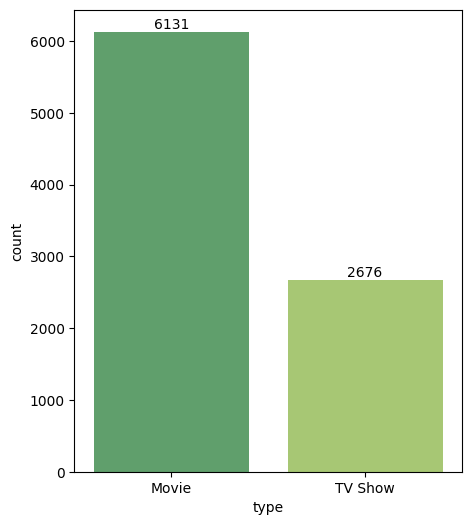

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(data=df,x=df['type'], palette='summer')
for i,count in enumerate(total_prod):
  plt.text(i,count,str(count),ha='center',va='bottom')
plt.show()
#CRR 2 NO 25 36 cerca al parque de los novios barrio el prado claudia medina

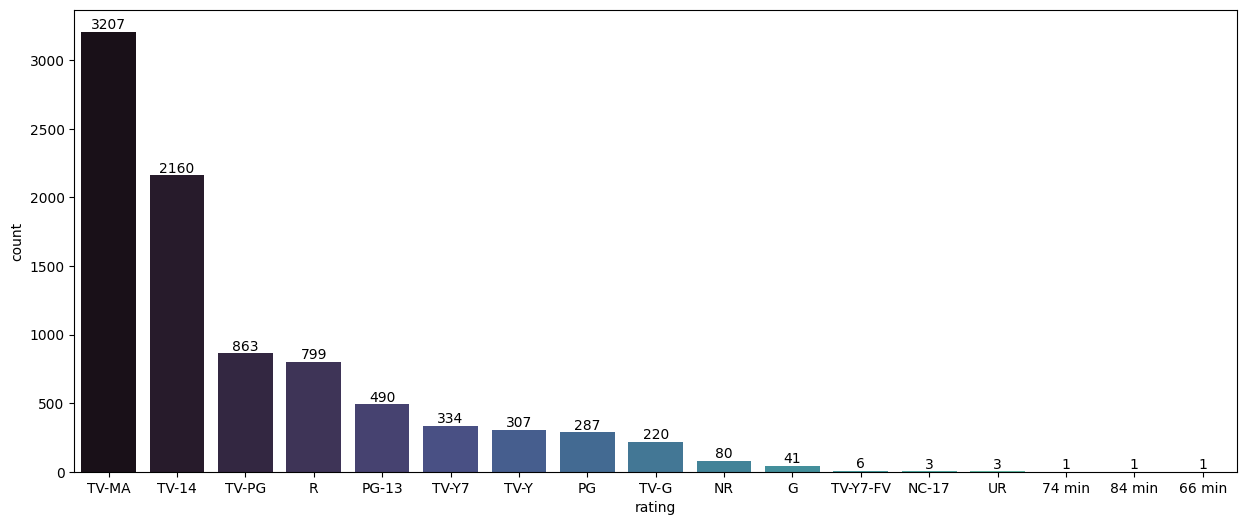

In [ ]:
from seaborn.categorical import countplot
plt.figure(figsize=(15,6))
count_df= df['rating'].value_counts()
order_df= count_df.sort_values(ascending=False).index
sns.countplot(data=df,x=df['rating'],palette='mako',order=order_df)
for i,count in enumerate(count_df):
  plt.text(i,count,str(count),ha='center',va='bottom')
plt.show()

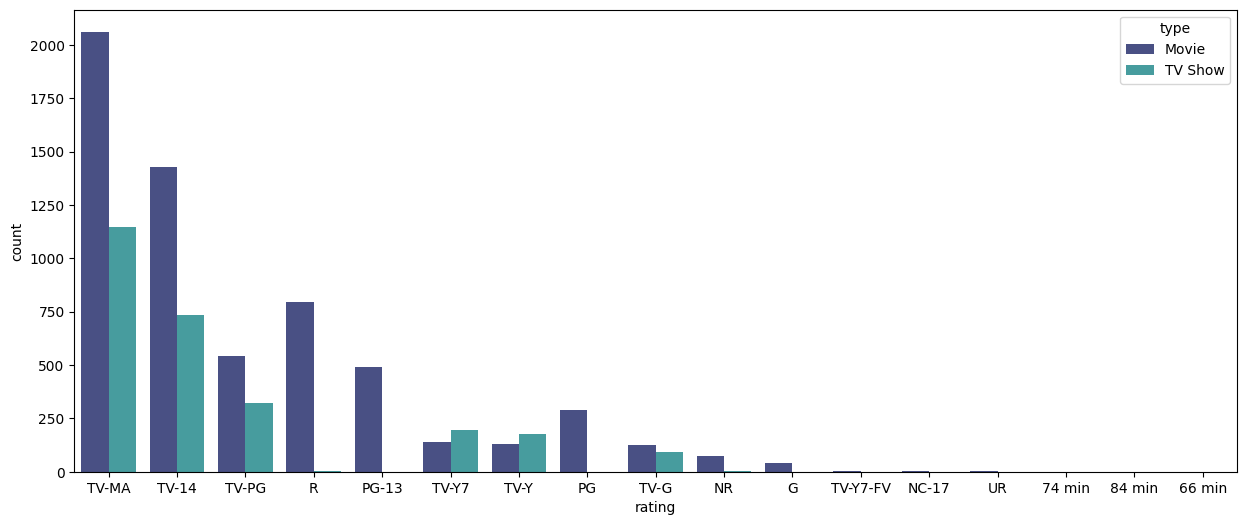

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x= df['rating'],palette='mako',hue=df['type'],order=order_df)
plt.show()

In [ ]:
df_movie = df[df['type']=='Movie']
df_movie.shape


(6131, 12)

In [ ]:
df_director = df_movie['director'].value_counts()
df_director = pd.DataFrame(df_director)
df_director.head()

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


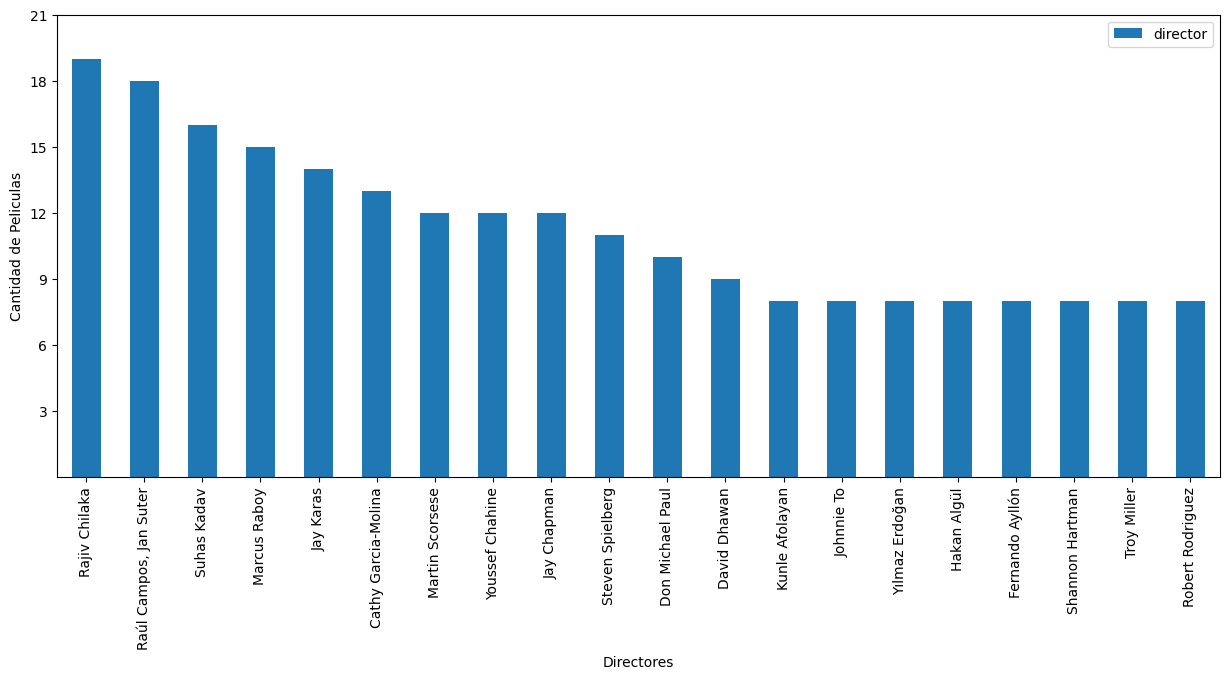

In [ ]:
df_director[:20].plot(kind='bar',figsize=(15,6))
plt.ylabel('Cantidad de Peliculas')
plt.xlabel('Directores')
plt.yticks([3,6,9,12,15,18,21])
plt.show()

In [ ]:
#acrores con mas peliculas
df_actor = df_movie.set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
df_actor = pd.DataFrame(df_actor)
df_actor.head()


,0
title,
My Little Pony: A New Generation,Vanessa Hudgens
My Little Pony: A New Generation,Kimiko Glenn
My Little Pony: A New Generation,James Marsden
My Little Pony: A New Generation,Sofia Carson
My Little Pony: A New Generation,Liza Koshy


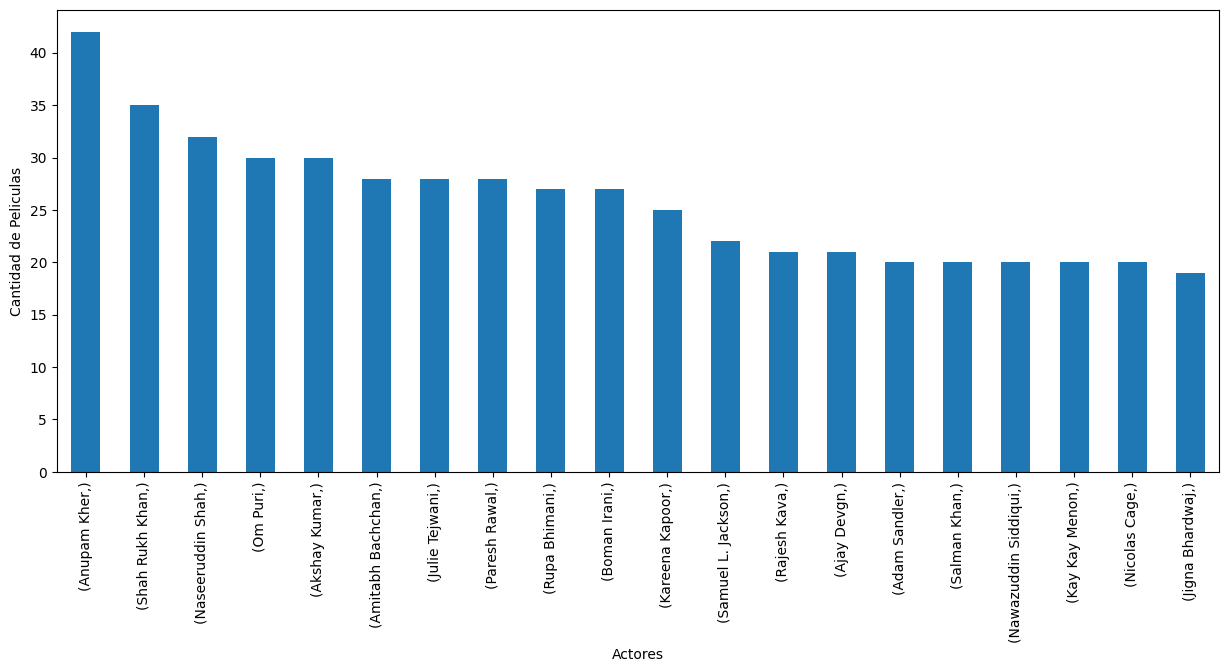

In [ ]:
count_actor = df_actor.value_counts()
count_actor[:20].plot(kind='bar',figsize=(15,6))
plt.ylabel('Cantidad de Peliculas')
plt.xlabel('Actores')
#plt.yticks([3,6,9,12,15,18,21])
plt.show()

In [ ]:
category_prod = df_actor = df_movie.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)

In [ ]:
top_listed_in = category_prod.value_counts()
top_listed_in

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
dtype: int64

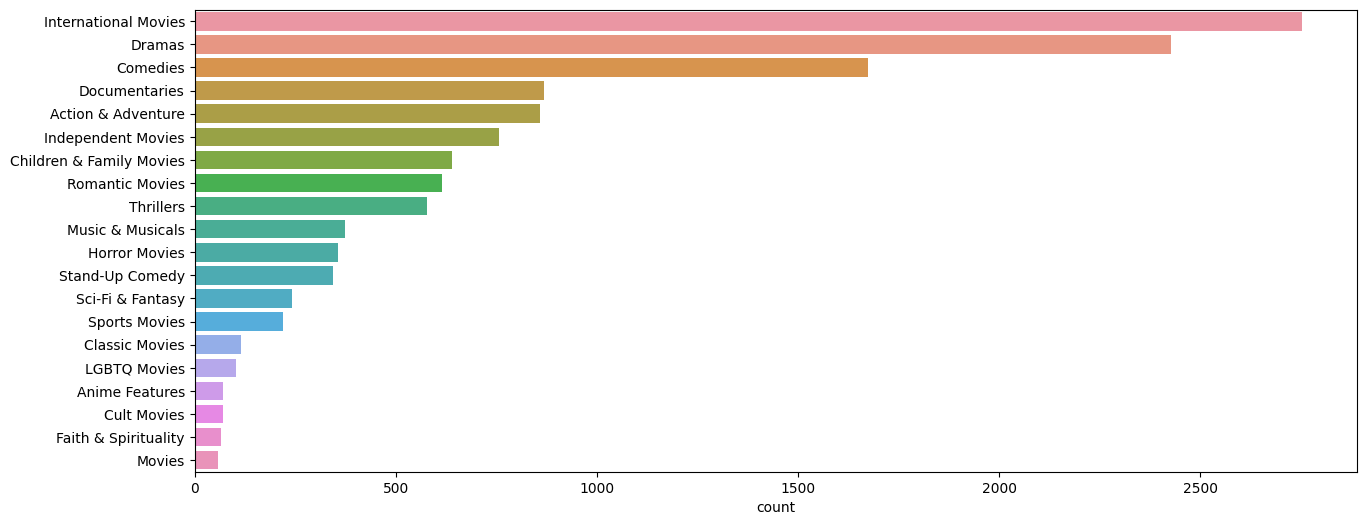

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y= category_prod, order= category_prod.value_counts().index[:20])
plt.show()

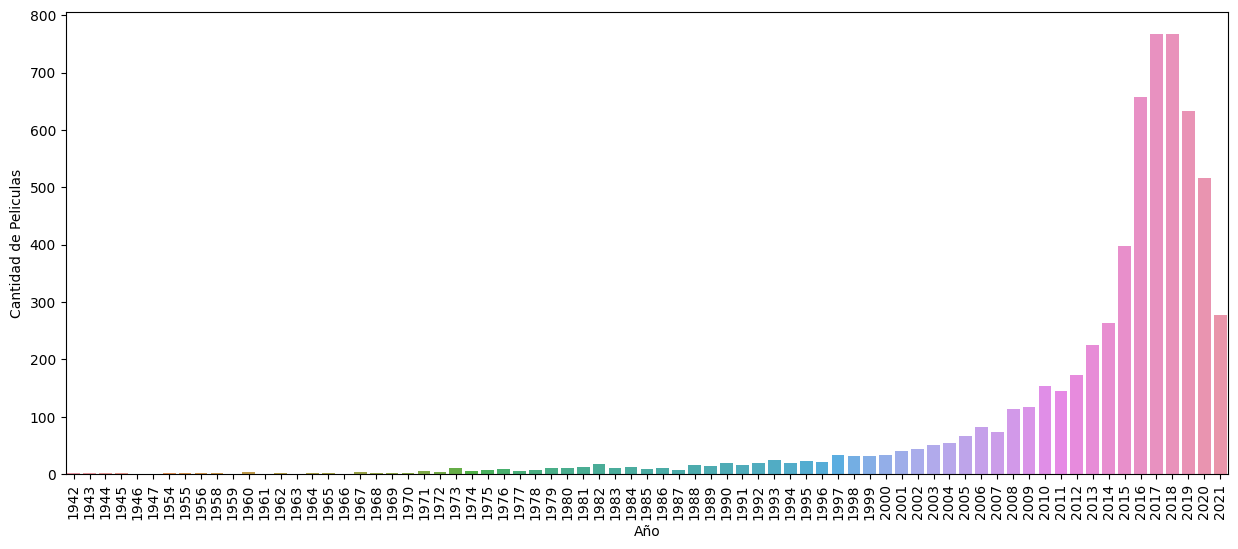

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df_movie['release_year'],data=df_movie)
plt.xlabel('Año')
plt.ylabel('Cantidad de Peliculas')
plt.xticks(rotation=90)
plt.show()

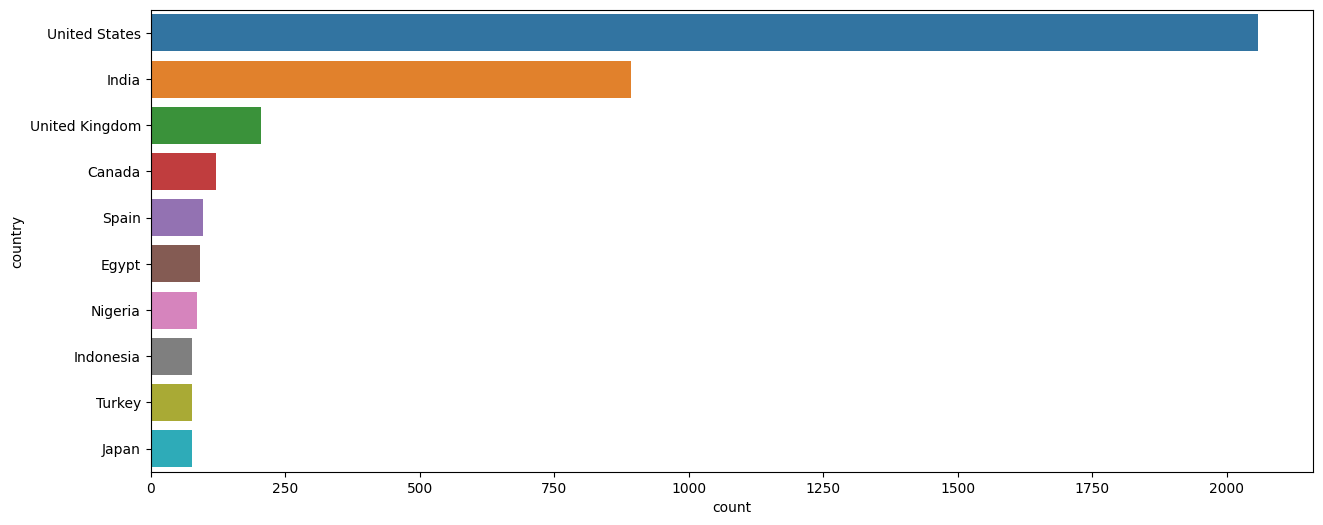

In [ ]:
#paises con mas peliculas
plt.figure(figsize=(15,6))
sns.countplot(data= df_movie, y = 'country',order= df_movie['country'].value_counts().index[:10])
plt.show()


In [ ]:
df_tv = df[df['type']== 'TV Show']
df_tv.shape

(2676, 12)

In [ ]:
# TOP DIRECTORES POR SERIES
top_director_tv = df_tv['director'].value_counts()
top_director_tv = pd.DataFrame(top_director_tv)
top_director_tv.head()

,director
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


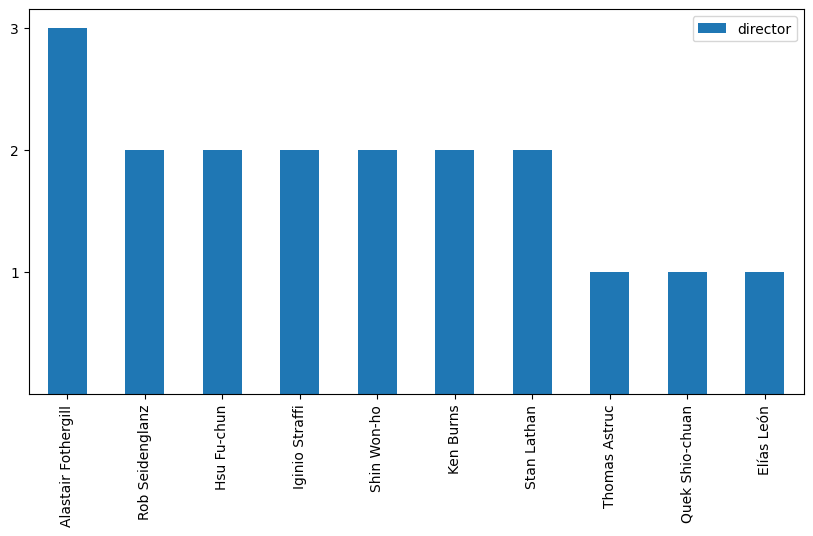

In [ ]:
top_director_tv[:10].plot(kind='bar',figsize=(10,5))
plt.yticks([1,2,3])
plt.show()

In [ ]:
#TOP ACTORES POR PELICULAS
top_actor_tv = df_tv.set_index('title').cast.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
top_actor_tv = pd.DataFrame(top_actor_tv)
top_actor_tv

,0
title,
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
Blood & Water,Dillon Windvogel
...,...
Zindagi Gulzar Hai,Sheheryar Munawar
Zindagi Gulzar Hai,Samina Peerzada
Zindagi Gulzar Hai,Waseem Abbas


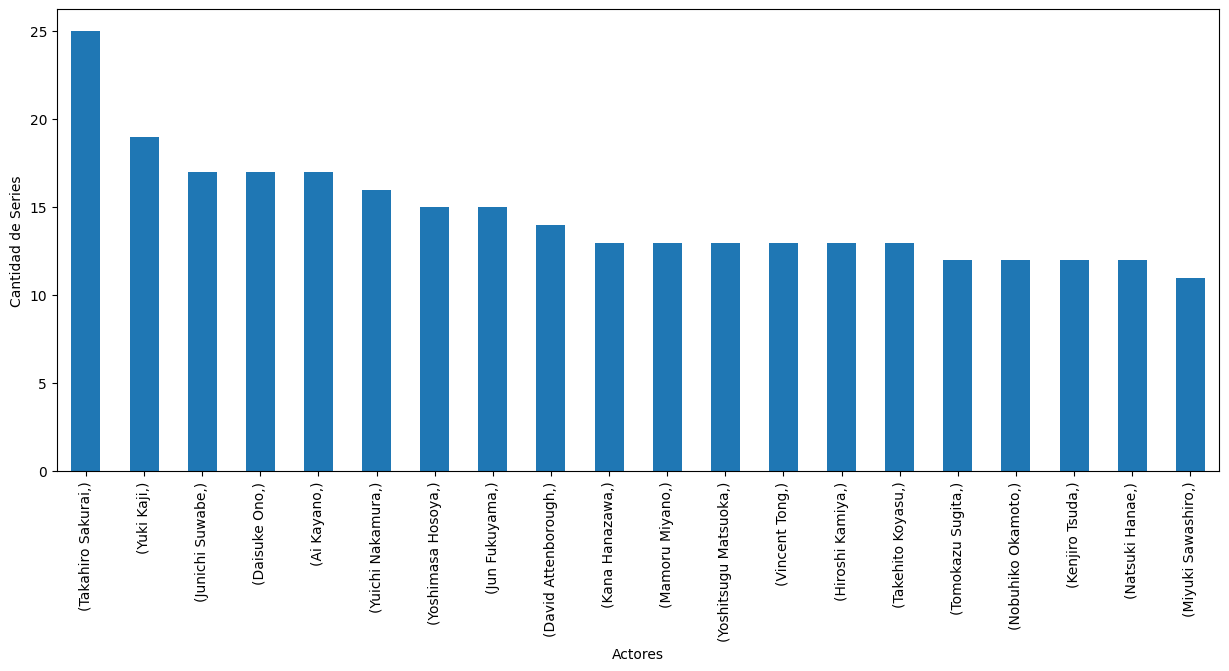

In [ ]:
count_actor_tv = top_actor_tv.value_counts()
count_actor_tv[:20].plot(kind='bar',figsize=(15,6))
plt.ylabel('Cantidad de Series')
plt.xlabel('Actores')
#plt.yticks([3,6,9,12,15,18,21])
plt.show()